# Zengxiang Zhao

In [1]:
import keras
import tensorflow as tf

Using TensorFlow backend.


In [74]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from sklearn.metrics import confusion_matrix



import matplotlib.pyplot as plt
%matplotlib inline

### A few hyper-parameters

In [75]:
batch_size = 128
num_classes = 10
epochs = 3

img_rows, img_cols = 28, 28

In [76]:
from keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [77]:
x_train.shape

(60000, 28, 28)

In [78]:
y_train.shape

(60000,)

In [79]:
x_test.shape

(10000, 28, 28)

In [80]:
y_test.shape

(10000,)

In [81]:
def display_image(data, nrows, ncols, index):
    plt.subplot(nrows, ncols, index)
    plt.imshow(data, cmap='plasma')

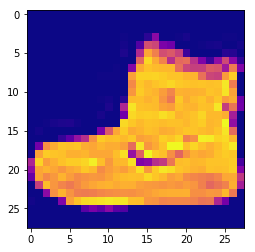

In [82]:

plt.imshow(x_train[0], cmap='plasma')

## Display 10 samples

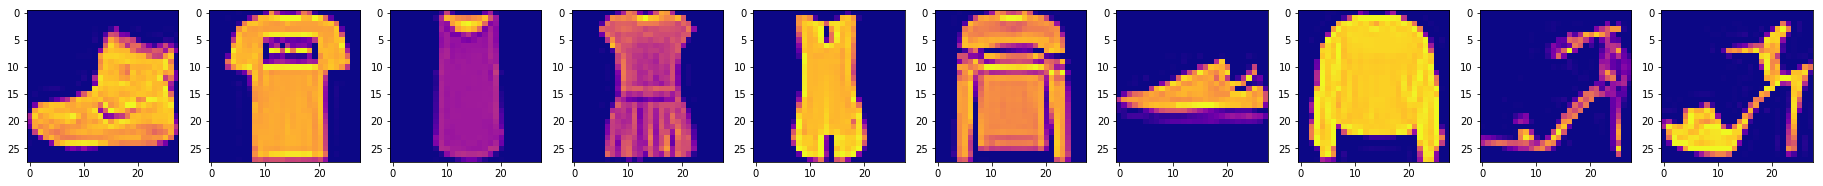

In [83]:
ncols = 10
plt.figure(figsize=(32,32))

for i in range(ncols):
    display_image(x_train[i], 1, ncols, i+1)

### The 10 possible classes are represented by a dictionary as follows, 

In [84]:
labels = {0:'T-shirt', 1: 'Trouser', 2:'Pullover', 3:'Dress',
          4: 'Coat', 5: 'Sandal', 6:'Shirt', 7:'Sneaker',
          8: 'Bag', 9: 'Ankle boot'
         }

In [85]:
#### 
if K.image_data_format()=='channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows,img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0],img_rows,img_cols,1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols,1)
    input_shape= (img_rows, img_cols, 1)
    
print(input_shape)

(28, 28, 1)


### Normalize the pixel values to be in [0.0, 1.0]

In [86]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255

### convert the class numbers to one-hot encoding

In [87]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

### Build a feed-forward deep learning model

In [88]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=[28,28,1]))

model.add(Conv2D(64, (3, 3), activation='relu'))

model.add(Conv2D(80, (3, 3), activation='relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(128, activation='relu'))

# model.add(Dropout(0.25))

# model.add(Dense(64, activation='relu'))

model.add(Dropout(0.5))

model.add(Dense(num_classes, activation='softmax'))

In [89]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 22, 22, 80)        46160     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 11, 11, 80)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 11, 11, 80)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 9680)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               1239168   
__________

In [90]:
model.compile(loss = keras.losses.categorical_crossentropy,
             optimizer=keras.optimizers.SGD(lr=0.1, momentum=0.01, decay = 0.005),
             metrics=['accuracy'])

In [91]:
%%time

model.fit(x_train,y_train,
         batch_size = batch_size,
         epochs=epochs,
         verbose =1,
         validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================] - 162s 3ms/step - loss: 0.7831 - acc: 0.7081 - val_loss: 0.5141 - val_acc: 0.7986
Epoch 2/3
60000/60000 [==============================] - 162s 3ms/step - loss: 0.5400 - acc: 0.8002 - val_loss: 0.4547 - val_acc: 0.8353
Epoch 3/3
60000/60000 [==============================] - 161s 3ms/step - loss: 0.4910 - acc: 0.8198 - val_loss: 0.4280 - val_acc: 0.8433
CPU times: user 14min 43s, sys: 9.79 s, total: 14min 53s
Wall time: 8min 5s


In [92]:
score = model.evaluate(x_test, y_test, verbose=1)

print('Test loss:', score[0])

print('Test accuracy:', score[1])

10000/10000 [==============================] - 9s 873us/step
Test loss: 0.42800175199508667
Test accuracy: 0.8433


In [93]:
import numpy as np

### Predict the imagine from the x_test

9
Ankle boot
CPU times: user 251 ms, sys: 38.6 ms, total: 290 ms
Wall time: 287 ms


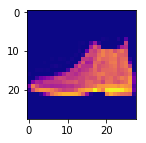

In [94]:
%%time
x_test_original = x_test.reshape(x_test.shape[0], img_rows, img_cols)
plt.figure(figsize=(2,2))
plt.imshow(x_test_original[0], cmap='plasma')


t = model.predict(x_test_original[0].reshape(-1,28,28,1))

cls = np.argmax(t)
print(cls)
print(labels[cls])

## Fill the model with x_test and predict the y_pred

#### Reshape the x_test before filling the model

In [95]:
y_pred = model.predict(x_test)

In [96]:
y_pred.shape

(10000, 10)

### Figure out the class from the softmax through np.argmax

In [97]:
%%time
y_pred_class = []
y_test_class = []

for i in range(x_test.shape[0]):
    y_pred_class.append(np.argmax(y_pred[i]))
    y_test_class.append(np.argmax(y_test[i]))

CPU times: user 46.5 ms, sys: 9.88 ms, total: 56.4 ms
Wall time: 48.4 ms


In [98]:
from sklearn.metrics import confusion_matrix
 

results = confusion_matrix(y_test_class, y_pred_class)
print(results)

[[843   3  20  41   6   2  65   0  20   0]
 [  4 964   0  23   5   1   1   0   2   0]
 [ 16   0 709  13 200   2  49   0  11   0]
 [ 32  12  10 867  46   0  28   0   5   0]
 [  1   2  67  31 855   1  36   0   7   0]
 [  0   0   0   1   0 957   0  27   1  14]
 [217   3 129  27 199   0 399   0  26   0]
 [  0   0   0   0   0  36   0 942   0  22]
 [  2   1   7   6   9   2   6   6 961   0]
 [  0   0   0   0   0  13   1  49   1 936]]


In [99]:
print('Using SGD optimizer, The model confuse:\n',
       labels[2],' and ', labels[4],'\n',
      labels[2], ' and ', labels[6], '\n',
     labels[6],' and ', labels[0],'\n',
      labels[6], ' and ', labels[2], '\n',
      labels[6], ' and ', labels[4], '\n',
     )

Using SGD optimizer, The model confuse:
 Pullover  and  Coat 
 Pullover  and  Shirt 
 Shirt  and  T-shirt 
 Shirt  and  Pullover 
 Shirt  and  Coat 



### Second optimizer: Adam

In [100]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),     # others:  Adagrad(), Adadelta(), Adam()
              metrics=['accuracy'])

In [101]:
%%time

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================] - 171s 3ms/step - loss: 0.4628 - acc: 0.8322 - val_loss: 0.3395 - val_acc: 0.8759
Epoch 2/3
60000/60000 [==============================] - 167s 3ms/step - loss: 0.3520 - acc: 0.8727 - val_loss: 0.2826 - val_acc: 0.8979
Epoch 3/3
60000/60000 [==============================] - 166s 3ms/step - loss: 0.3007 - acc: 0.8901 - val_loss: 0.2706 - val_acc: 0.9008
CPU times: user 16min 36s, sys: 10.6 s, total: 16min 46s
Wall time: 8min 25s


In [102]:
score = model.evaluate(x_test, y_test, verbose=1)

print('Test loss:', score[0])

print('Test accuracy:', score[1])

10000/10000 [==============================] - 9s 872us/step
Test loss: 0.2705862065553665
Test accuracy: 0.9008


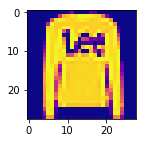

In [103]:

plt.figure(figsize=(2,2))
plt.imshow(x_test_original[1], cmap='plasma')

In [104]:
%%time
t = model.predict(x_test_original[1].reshape(-1,28,28,1))

cls = np.argmax(t)
print(cls)
print(labels[cls])

2
Pullover
CPU times: user 259 ms, sys: 24.2 ms, total: 283 ms
Wall time: 282 ms


In [105]:
%%time
y_pred_class_Adam = []
y_test_class_Adam = []

for i in range(x_test.shape[0]):
    y_pred_class_Adam.append(np.argmax(y_pred[i]))
    y_test_class_Adam.append(np.argmax(y_test[i]))

CPU times: user 38.1 ms, sys: 5.58 ms, total: 43.7 ms
Wall time: 41.5 ms


In [106]:

 

results = confusion_matrix(y_pred_class_Adam,y_test_class_Adam)
print(results)


[[843   4  16  32   1   0 217   0   2   0]
 [  3 964   0  12   2   0   3   0   1   0]
 [ 20   0 709  10  67   0 129   0   7   0]
 [ 41  23  13 867  31   1  27   0   6   0]
 [  6   5 200  46 855   0 199   0   9   0]
 [  2   1   2   0   1 957   0  36   2  13]
 [ 65   1  49  28  36   0 399   0   6   1]
 [  0   0   0   0   0  27   0 942   6  49]
 [ 20   2  11   5   7   1  26   0 961   1]
 [  0   0   0   0   0  14   0  22   0 936]]


In [107]:
print('Using Adam optimizer, The model confuse:\n',
      labels[0], ' and ', labels[6],
       labels[2],' and ', labels[4],'\n',
      labels[2], ' and ', labels[6], '\n',
      labels[4], ' and ', labels[2], '\n',
      labels[4], 'and ', labels[6], '\n',
     labels[6],' and ', labels[0],'\n',
      labels[6], ' and ', labels[2], '\n',
      
     )

Using Adam optimizer, The model confuse:
 T-shirt  and  Shirt Pullover  and  Coat 
 Pullover  and  Shirt 
 Coat  and  Pullover 
 Coat and  Shirt 
 Shirt  and  T-shirt 
 Shirt  and  Pullover 



### Third optimizer: Adagrad 

In [108]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adagrad(),     # others:  Adagrad(), Adadelta(), Adam()
              metrics=['accuracy'])

In [109]:
%%time

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================] - 162s 3ms/step - loss: 0.3067 - acc: 0.8924 - val_loss: 0.2494 - val_acc: 0.9099
Epoch 2/3
60000/60000 [==============================] - 163s 3ms/step - loss: 0.2372 - acc: 0.9139 - val_loss: 0.2306 - val_acc: 0.9156
Epoch 3/3
60000/60000 [==============================] - 165s 3ms/step - loss: 0.2217 - acc: 0.9198 - val_loss: 0.2266 - val_acc: 0.9193
CPU times: user 15min 40s, sys: 9.88 s, total: 15min 50s
Wall time: 8min 10s


In [110]:
score = model.evaluate(x_test, y_test, verbose=1)

print('Test loss:', score[0])

print('Test accuracy:', score[1])

10000/10000 [==============================] - 9s 902us/step
Test loss: 0.22655375629663468
Test accuracy: 0.9193


1
Trouser
CPU times: user 292 ms, sys: 18.9 ms, total: 311 ms
Wall time: 309 ms


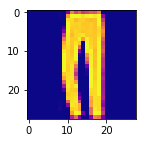

In [111]:
%%time
# x_test_original = x_test.reshape(x_test.shape[0], img_rows, img_cols)
plt.figure(figsize=(2,2))
plt.imshow(x_test_original[2], cmap='plasma')


t = model.predict(x_test_original[2].reshape(-1,28,28,1))

cls = np.argmax(t)
print(cls)
print(labels[cls])

In [112]:
%%time
y_pred_class_Adagrad = []
y_test_class_Adagrad = []

for i in range(x_test.shape[0]):
    y_pred_class_Adagrad.append(np.argmax(y_pred[i]))
    y_test_class_Adagrad.append(np.argmax(y_test[i]))

CPU times: user 41.1 ms, sys: 7.91 ms, total: 49 ms
Wall time: 43.5 ms


In [113]:
results = confusion_matrix(y_pred_class_Adam,y_test_class_Adam)
print(results)

[[843   4  16  32   1   0 217   0   2   0]
 [  3 964   0  12   2   0   3   0   1   0]
 [ 20   0 709  10  67   0 129   0   7   0]
 [ 41  23  13 867  31   1  27   0   6   0]
 [  6   5 200  46 855   0 199   0   9   0]
 [  2   1   2   0   1 957   0  36   2  13]
 [ 65   1  49  28  36   0 399   0   6   1]
 [  0   0   0   0   0  27   0 942   6  49]
 [ 20   2  11   5   7   1  26   0 961   1]
 [  0   0   0   0   0  14   0  22   0 936]]


# Conclusion:  
 The model confuse:
 T-shirt  and  Shirt ； 
 Pullover  and  Shirt ；
 Coat and  Shirt 